In [1]:
from datasets import load_dataset
from transformers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wordcloud
from wordcloud import WordCloud
import nlp

/Users/maxhager/.virtualenvs/thesis/lib/python3.10/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [2]:
#load dataset from HuggingFace not split into train and test
dataset = load_dataset('conll2003', split=None)

#command before didnt worked for me so I needed to combine the train, validation and test set
merged_data = nlp.Dataset.from_pandas(pd.concat([dataset['train'].to_pandas(), dataset['validation'].to_pandas(), dataset['test'].to_pandas()]))

Found cached dataset conll2003 (/Users/maxhager/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
#display a sample entry of the dataset
print(merged_data[1])
df = pd.DataFrame(merged_data['ner_tags'])

#calculate how often a single each ner tag occurs
result= df.value_counts()

{'id': '1', 'tokens': ['Peter', 'Blackburn'], 'pos_tags': [22, 22], 'chunk_tags': [11, 12], 'ner_tags': [1, 2], '__index_level_0__': 1}


In [4]:
full_names_tags = {"O":"Ordinal", "B-PER":"Begining of a person", "I-PER":"Inside of a person", "B-ORG":"Begining of an organization", "I-ORG":"Inside of an organization", "B-LOC":"Begining of a location", "I-LOC":"Inside of a location", "B-MISC":"Begining of a miscellaneous entity", "I-MISC":"Inside of a miscellaneous entity"}

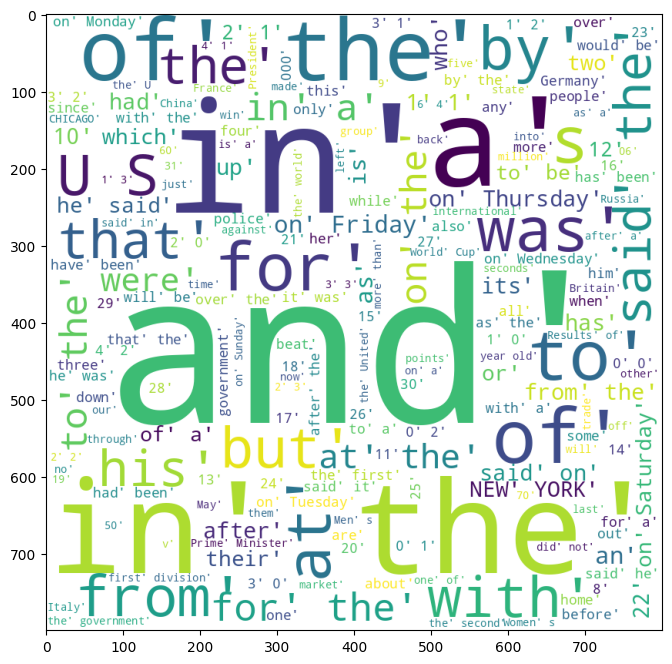

In [5]:
wordcloud = WordCloud(width = 800, height = 800,background_color='white',min_font_size=10).generate(str(merged_data['tokens']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [10]:
# i need to iterate over a large file and 
#print number of lines of merged_data
print(len(merged_data["ner_tags"]))
#print(merged_data[100])

20744


       0    1    2    3    4    5    6    7    8    9    ...  114  115  116  \
0        3  0.0  7.0  0.0  0.0  0.0  7.0  0.0  0.0  NaN  ...  NaN  NaN  NaN   
1        1  2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2        5  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3        0  3.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0  ...  NaN  NaN  NaN   
4        5  0.0  0.0  0.0  0.0  3.0  4.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
20739    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
20740    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
20741    1  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
20742    0  0.0  5.0  0.0  0.0  0.0  7.0  8.0  0.0  0.0  ...  NaN  NaN  NaN   
20743    0  0.0  0.0  3.0  4.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   

       117  118  119  120  121  122  123  
0      N

AttributeError: 'AxesSubplot' object has no attribute 'show'

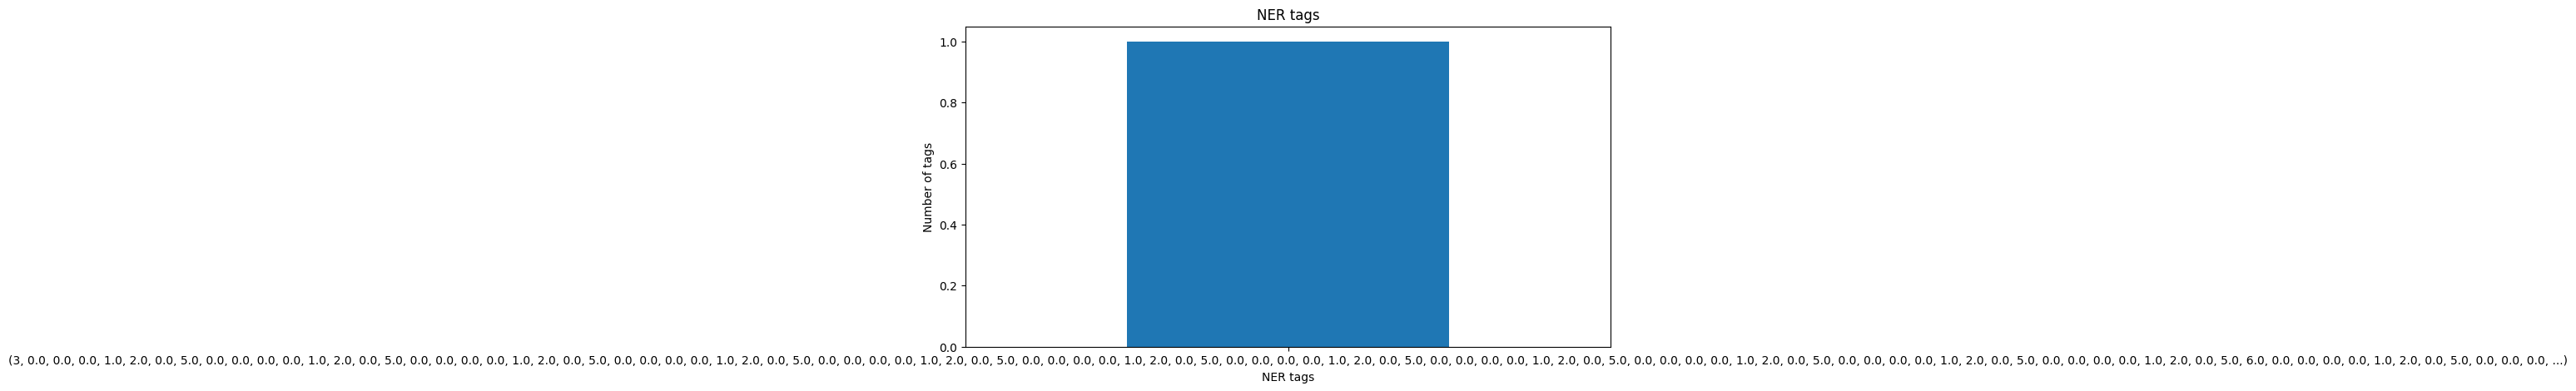

In [7]:
#create a df of merged_data['ner_tags']
df = pd.DataFrame(merged_data['ner_tags'])
print(df)
#print(df.value_counts())
# create a bar plot with the number of each tag but convert each tag to the appropriate value from full_names_tags 
plt = df.value_counts().plot(kind='bar', title='NER tags', figsize=(10, 5), rot=0)
plt = df.value_counts().plot(kind='bar', title='NER tags', figsize=(10, 5), rot=0)
plt.set_xlabel("NER tags")
plt.set_ylabel("Number of tags")
plt.show()

In [ ]:
#create a dict with the amount of tags as keys and a counter 0 as value
for i in range(len(merged_data)):
  for tag in merged_data['ner_tags'][i]:
    if tag in full_names_tags:
      full_names_tags[tag] += 1
print(full_names_tags)
#iter over dataset ner_tags and iter over tags - if a tag matches increase counter for a key in the dict increase by one

#convert dict numbers to the name what this tag is
#create bar plot with names in x and amount in y axis

KeyboardInterrupt: 